<a href="https://colab.research.google.com/github/YangRyRay/cs480student/blob/main/07/Copy_of_CS480_Assignment_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

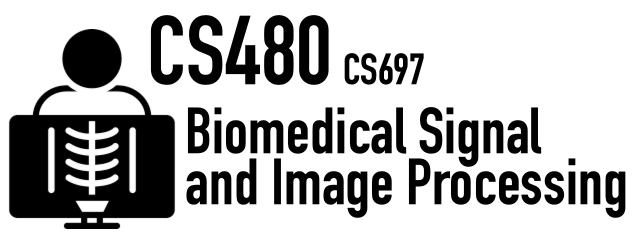
#Assignment 7

In [ ]:
# In this assignment, we will explore the Imaging Data Commons,
# a new service from the National Cancer Institute.
#
# We will find and explore a PET dataset and then perform a MIP reconstruction.

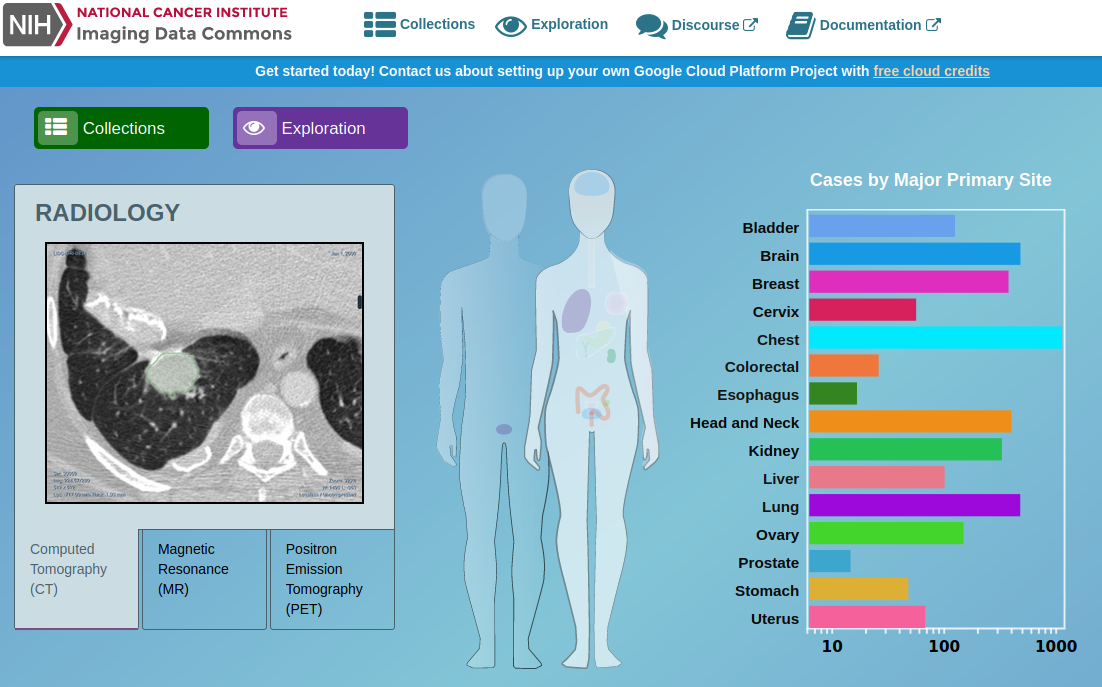

**Task 1**: Browse the IDC datasets and find a combined CT or MRI with PET! [15 Points]

In [ ]:
#
# Visit https://portal.imaging.datacommons.cancer.gov/ and find a dataset
# that includes structural imaging such as CT or MRI combined with a PET scan.
#
# You can start by selecting the type of a cancer case such as Bladder, Brain etc.
# Hint: Head and Neck include many PET scans.
#

In [ ]:
# TODO: Open the integrated OHIF viewer to view the data.
#
# 1) Select a collection, then a case, then a study in the IDC interface.
# 2) To open the OHIF viewer, click on the view icon.
# 3) Paste a screenshot of the viewer after the data was loaded below.
#

TODO: Add screenshot

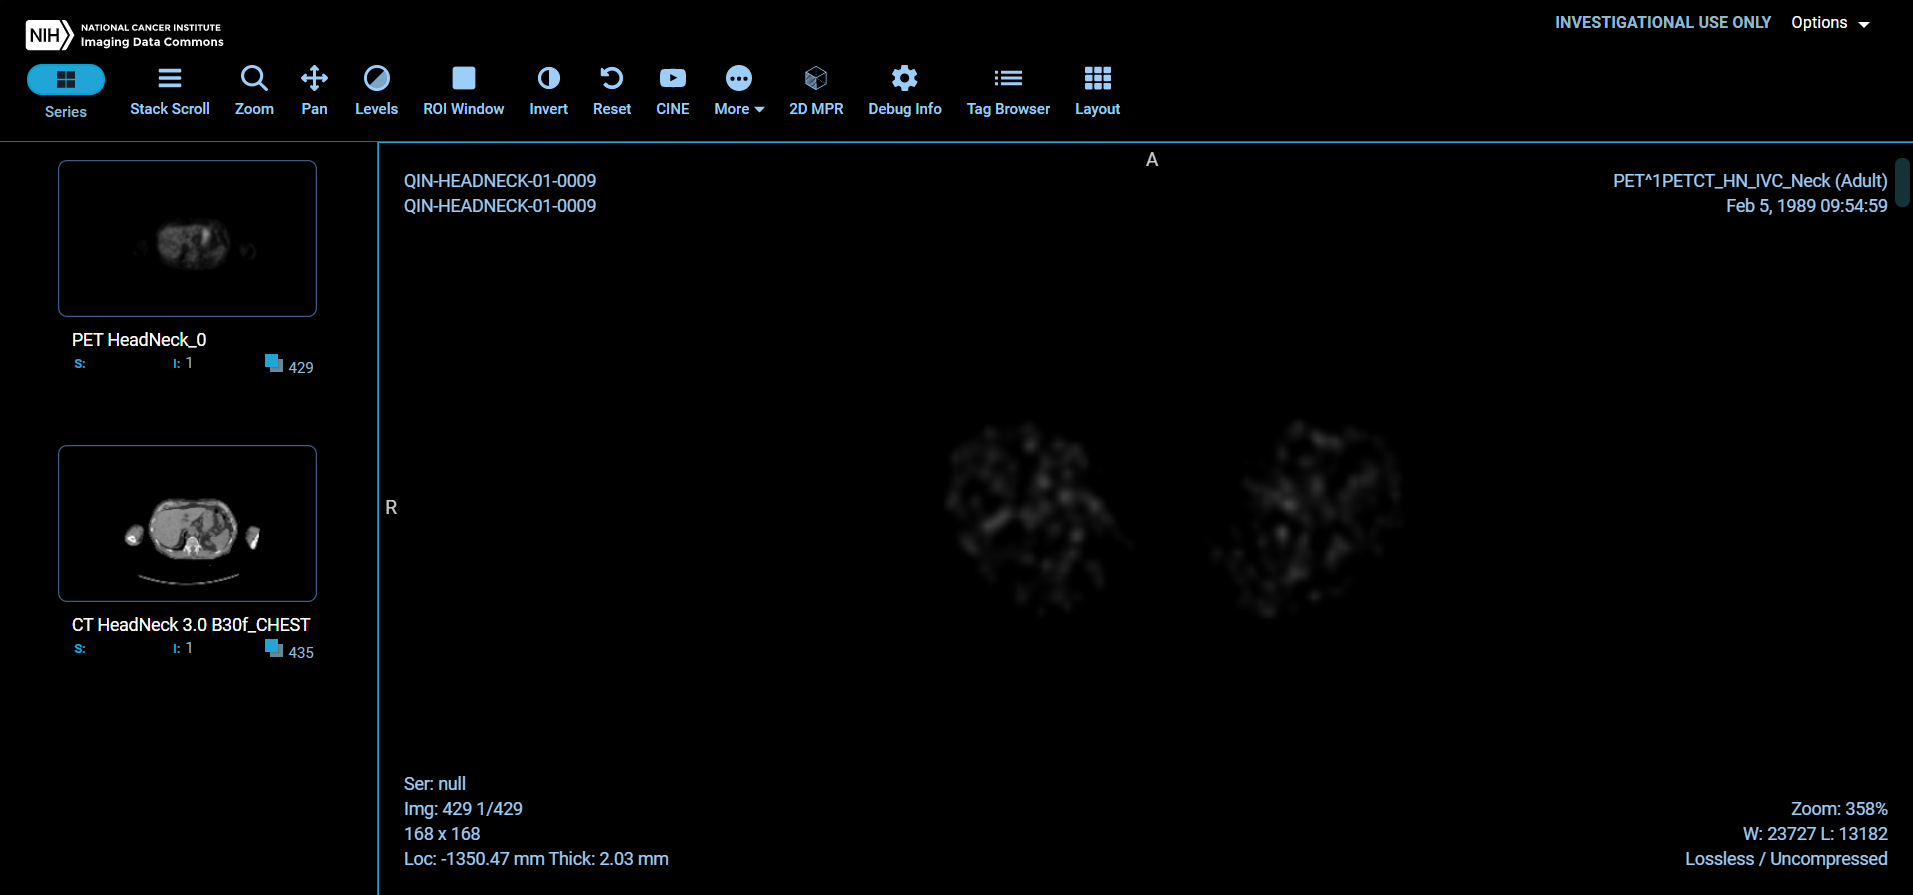

**Task 2**: Visualize structural and PET side-by-side! [30 Points]

In [ ]:
# In the OHIF viewer, please change the layout to show the structural image
# next to the PET scan.
#
# TODO: Use the LAYOUT functionality in the toolbar to switch to a 2-column layout.

In [ ]:
# TODO: Find the cancerous lesion.
#
# 1) Navigate through the PET image to find the cancerous lesion.

In [ ]:
# TODO: Sync the structural scan (CT or MR) to the PET scan with the lesion.
#
# Hint: The "Loc" label in the bottom left of both scans should roughly match.
# Hint 2: The Levels tool allows Window/Level adjustment to increase contrast.
#

In [ ]:
# TODO: Paste a screenshot showing the 2-column layout below.

TODO: Add screenshot
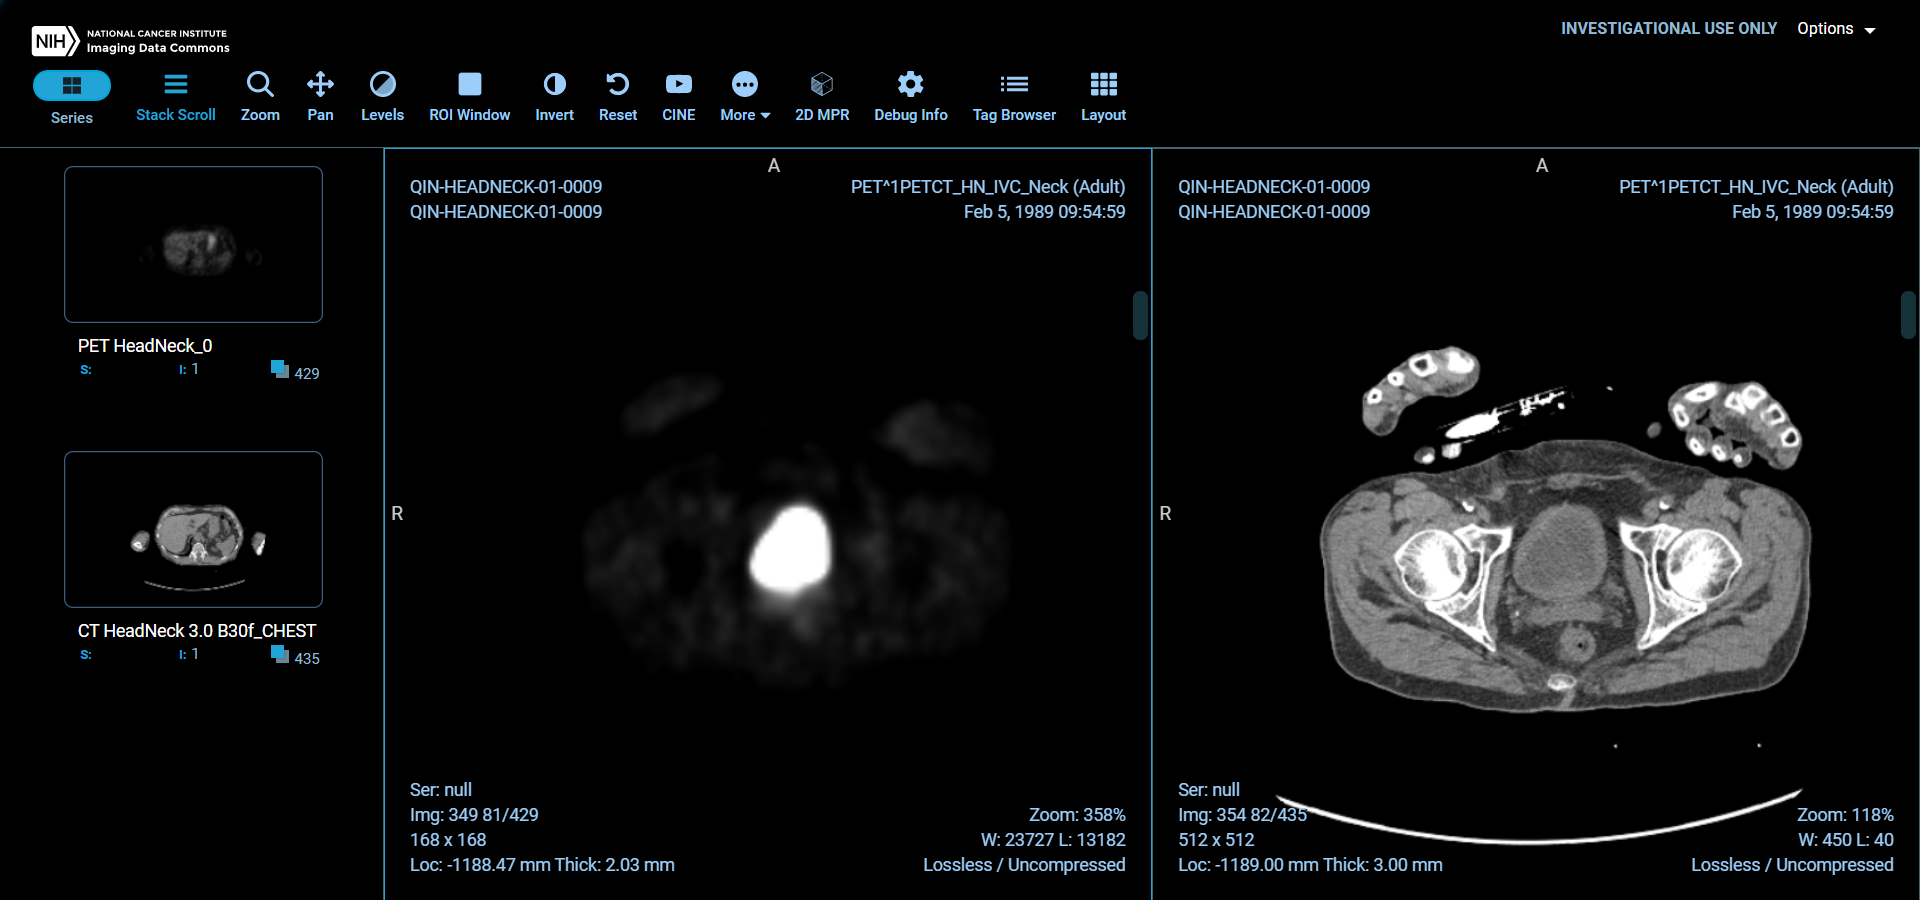

**Task 3**: Use an MIP to reslice the PET scan! [35 Points]

In [ ]:
# We will now use the 2D MPR functionality to look at the lesion from different
# orientations.
#
# Hint: This works best in Google Chrome.

In [ ]:
# Question 1): What is MPR?
# MPR stands for either Minnesota Public Radio, or Multiplanar Reformation. I 
# assume it is Multiplanar Reformation in this context, which is reconstructing 
# the volumetric data from one plane to another.

In [ ]:
# TODO: YOUR ANSWER
# MPR stands for either Minnesota Public Radio, or Multiplanar Reformation. I 
# assume it is Multiplanar Reformation in this context, which is reconstructing 
# the volumetric data from one plane to another.

In [ ]:
# Question 2): What is the difference between MIP, MinIP, AvgIP?
# MIP, MinIP, and AvgIP are different ways to project intensity. MIP is Maximum 
# Intensity Projection, where the pixel with the greatest intensity within a 
# certain range of the 3D imaging data is projected to a 2D image which 
# agregates These values from each pixel stack. Similarly, MinIP stands for 
# Minimum Intensity Projection, and creates images with the least intensity 
# pixel. AvgIP is average Intensity Projection, and uses the average of the 
# values defined within the range to project the values for the 2D images. The 
# differences between the 3 are clearer when looking at the MPR for the CT data.
# The range with which these values are determined is controlled using slab 
# thickness.

In [ ]:
# TODO: YOUR ANSWER

In [ ]:
# Now, please navigate to the lesion in all 3 orientations. 
#
# TODO: Paste a screenshot below.
#

TODO: Add screenshot
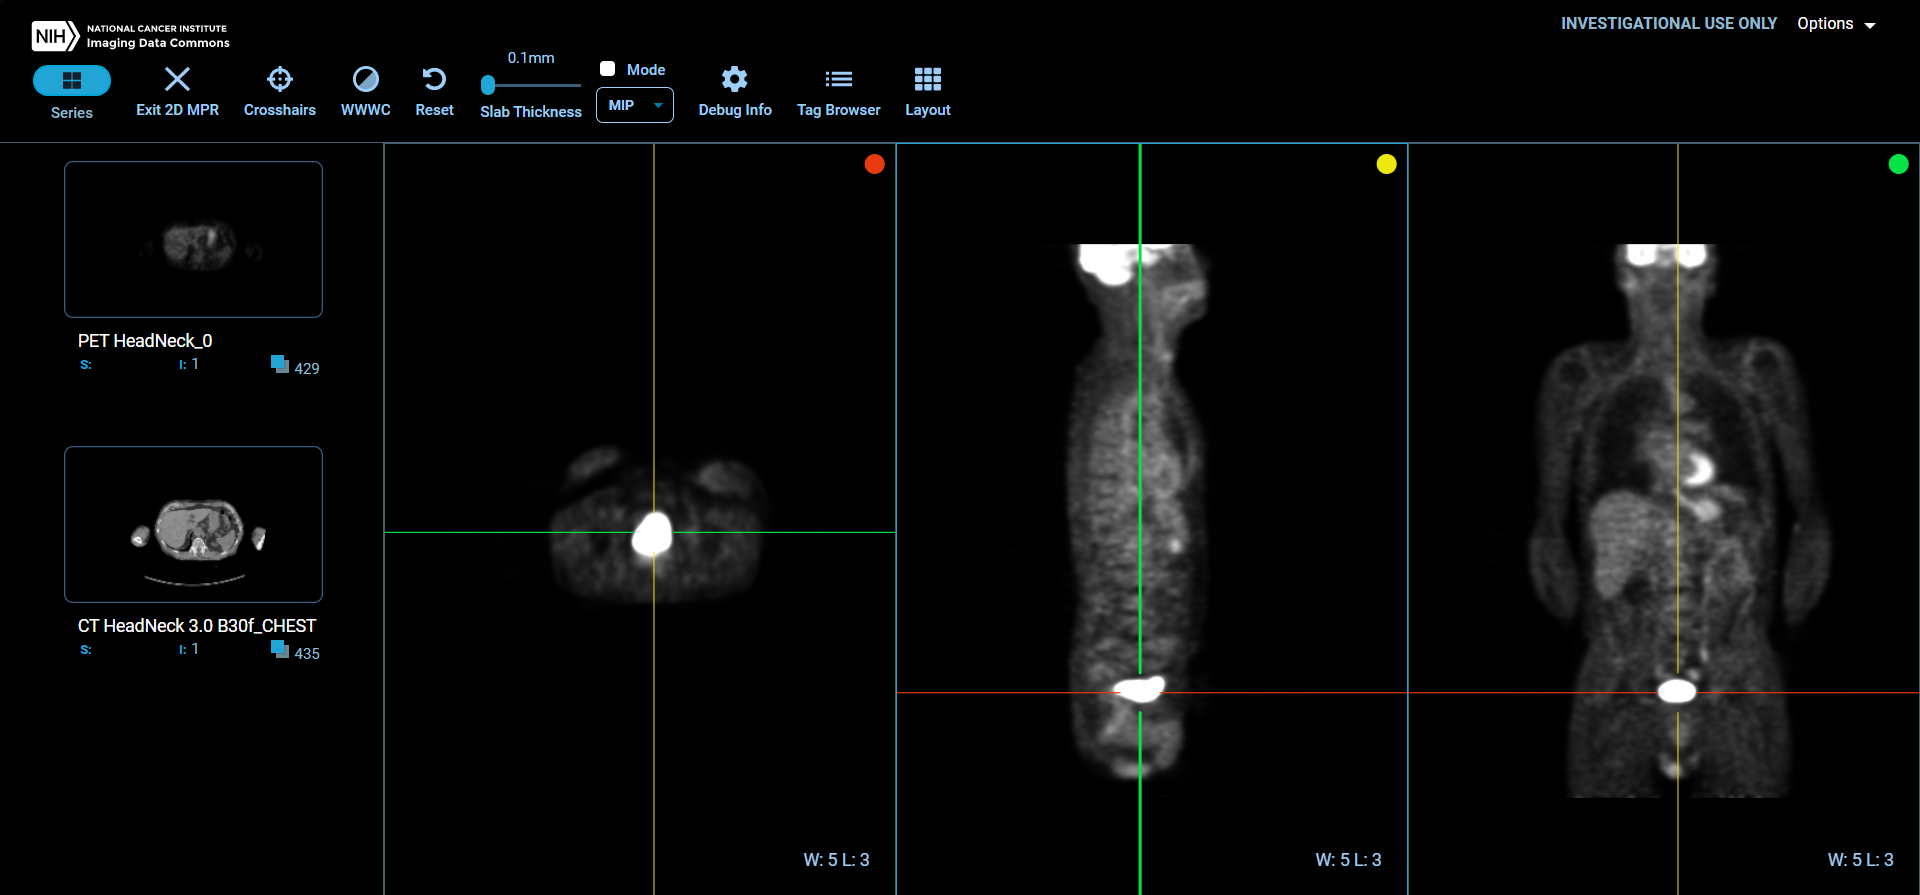

In [ ]:
# Question 3): What does the Slab Thickness slider do?
# The Slab Thickness slider controls slab thickness, which determines how wide 
# or narrow of a range for the MIP, MinIP, or AvgIP to account for.

In [ ]:
# TODO: YOUR ANSWER
# The Slab Thickness slider controls slab thickness, which determines how wide 
# or narrow of a range for the MIP, MinIP, or AvgIP to account for.

**Task 4**: Let's access the pixel data! [20 Points]

In [ ]:
# Please EXIT THE 2D MPR.
#
# We will now grab the pixel data of the currently displayed slice
# using the Javascript console.
#

In [ ]:
# 1) Open the Developer Tools of your browser and access the JS console.
#

In [ ]:
# 2) The following code allows to access the pixel data of the slice that
# is currently displayed.
#
# element = cornerstone.getEnabledElements()[0];
# pixels = element.image.getPixelData();
#

In [ ]:
# Question 4): What is the maximum pixel value of the current slice?
#
# Hint: There are multiple ways of doing this according to
# https://medium.com/coding-at-dawn/the-fastest-way-to-find-minimum-and-maximum-values-in-an-array-in-javascript-2511115f8621
#

In [ ]:
# TODO: YOUR ANSWER

# > element = cornerstone.getEnabledElements()[0];
# > pixels = element.image.getPixelData();
# > Math.max(...pixels)
# The max pixel value for the current slice is 2131.

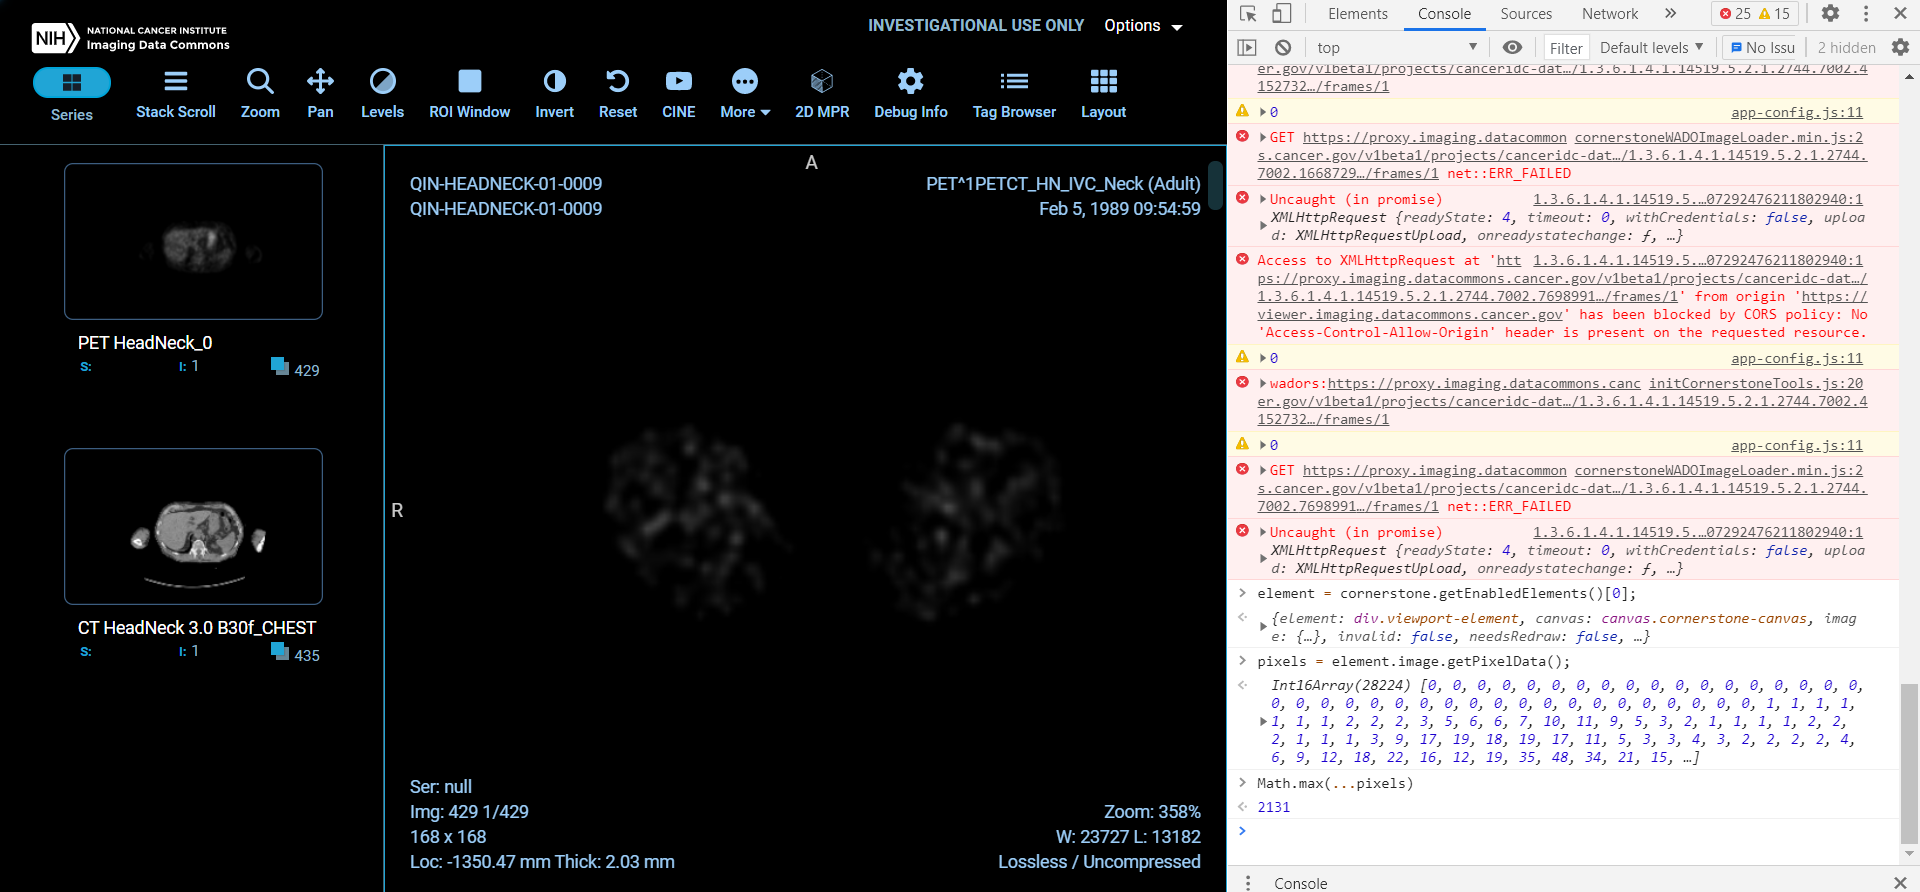

**Bonus**: Apply a filter mask to the current slice! [33 Points]


In [ ]:
# Here we will modify the pixel data!
#
# The following code allows you to set the pixels of the current slice.
#
#   pixels.set(new_pixels);
#
# Write code to APPLY A FILTER MASK to the pixels.
#
# Hint: You can use the following code to get the dimensions of the current slice.
#   w = element.image.width;
#   h = element.image.height;
#
# You can decide which filter mask to apply (e.g., Gaussian blur, edge detection..).
#
# ** IMPORTANT **
# Hint 2: Triggering a REDRAW programmatically might be hard but you can use
# the LEVELS tool to manually trigger a redraw to see filtered pixels.
# ** IMPORTANT **

In [ ]:
#
#
# TODO: YOUR CODE GOES HERE
#
#
"""
element = cornerstone.getEnabledElements()[0];
pixels = element.image.getPixelData();
pixelsA  =Array.from(pixels);

w = element.image.width;
h = element.image.height;

var pixels_reshape = [];
while(pixelsA.length) pixels_reshape.push(pixelsA.splice(0,w));

var i;
var j;

var new_pixels = new Array(h);
for (i=0; i < new_pixels.length; i++){
  new_pixels[i]=new Array(w);
  new_pixels[i].fill(0)
}

for (i = 1; i < h-1; i++) {
  for (j = 1; j < w-1; j++) {
    var valx = 0;
    var valy = 0;
    var ul = pixels_reshape[i-1][j-1];
    var um = pixels_reshape[i-1][j];
    var ur = pixels_reshape[i-1][j+1];
    var ml = pixels_reshape[i][j-1];
    var mm = pixels_reshape[i][j];
    var mr = pixels_reshape[i][j+1];
    var ll = pixels_reshape[i+1][j-1];
    var lm = pixels_reshape[i+1][j];
    var lr = pixels_reshape[i+1][j+1];
    valx = ul + ml*2 + ll - ur - mr*2 - lr;
    valy = ul + um*2 + ur - ll - lm*2 - lr;

    new_pixels[i][j]=Math.abs(valx)+Math.abs(valy);    
  }
}

var new_pixels_flat = Array.prototype.concat.apply([], new_pixels);

pixels.set(new_pixels_flat);
"""

In [ ]:
# TODO: Please add a screenshot after filtering the current slice.

TODO: ADD SCREENSHOT
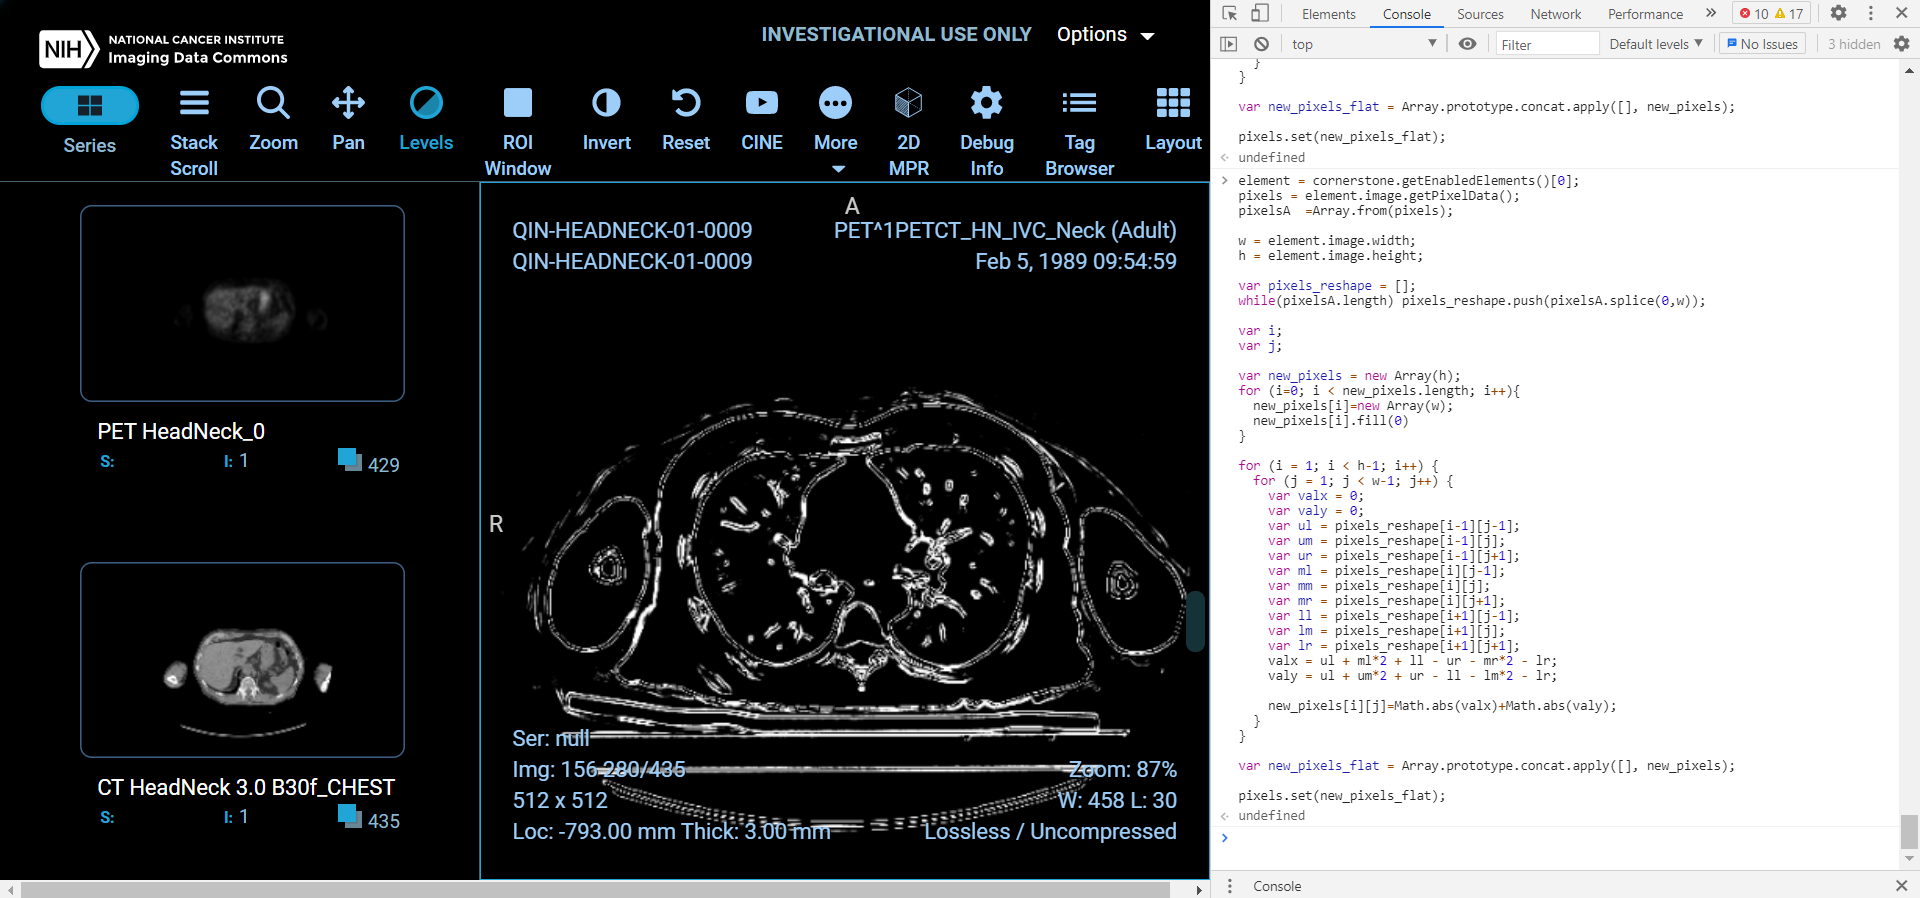

In [ ]:
#
# SUPER BONUS (+33 extra): Can you trigger the redraw programmatically?
#

In [ ]:
# TODO: YOUR CODE FOR REDRAW GOES HERE
# Unable to figure this one out

In [ ]:
# ¯\_(ツ)_/¯

In [ ]:
#
# THANK YOU!!!
#
#       .--..--..--..--..--..--.
#     .' \  (`._   (_)     _   \
#   .'    |  '._)         (_)  |
#   \ _.')\      .----..---.   /
#   |(_.'  |    /    .-\-.  \  |
#   \     0|    |   ( O| O) | o|
#    |  _  |  .--.____.'._.-.  |
#    \ (_) | o         -` .-`  |
#     |    \   |`-._ _ _ _ _\ /
#     \    |   |  `. |_||_|   |
#     | o  |    \_      \     |     -.   .-.
#     |.-.  \     `--..-'   O |     `.`-' .'
#   _.'  .' |     `-.-'      /-.__   ' .-'
# .' `-.` '.|='=.='=.='=.='=|._/_ `-'.'
# `-._  `.  |________/\_____|    `-.'
#    .'   ).| '=' '='\/ '=' |
#    `._.`  '---------------'
#            //___\   //___\
#              ||       ||
#     LGB      ||_.-.   ||_.-.
#             (_.--__) (_.--__)
#
#